## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

kung_san_data = pd.read_csv('student.csv')
kung_san_data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
y = kung_san_data['Hours'].values
x = kung_san_data['Scores'].values

In [8]:
kung_san_data = pd.read_csv('student.csv')
print(kung_san_data.shape)

(25, 2)


In [11]:
kung_san_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
kung_san_data.isnull().values.any()


False

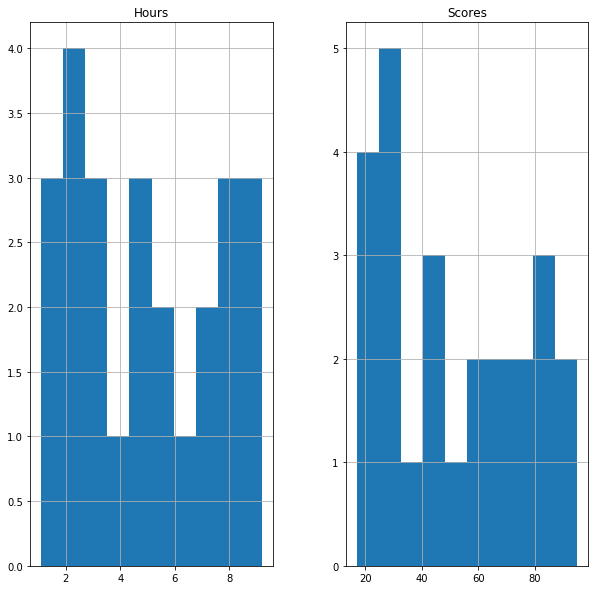

In [13]:
kung_san_data.hist(bins=10,figsize=(10,10))
plt.show()

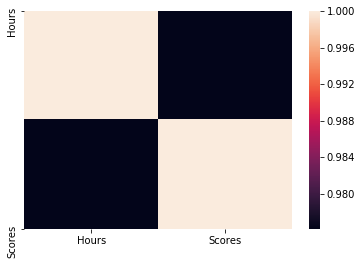

In [16]:
sns.heatmap(kung_san_data.corr())


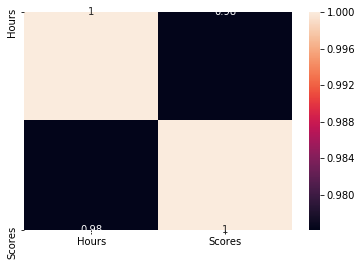

In [17]:
sns.heatmap(kung_san_data.corr(), annot=True)

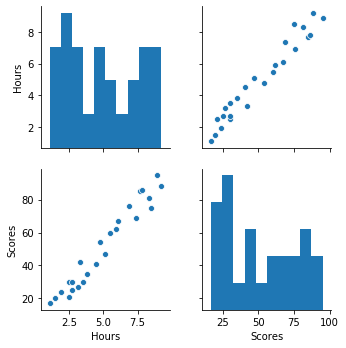

In [18]:
sns.pairplot(kung_san_data)

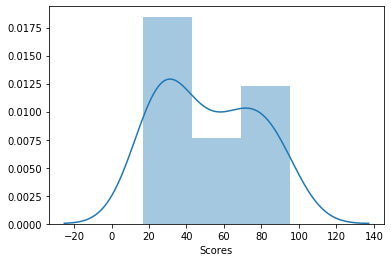

In [20]:
sns.distplot(kung_san_data['Scores'])

<Figure size 864x720 with 0 Axes>

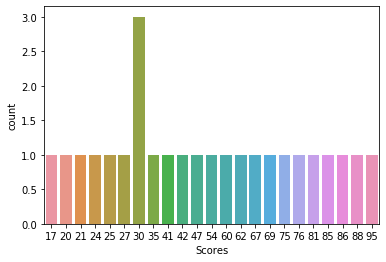

<Figure size 864x720 with 0 Axes>

In [19]:
import seaborn as sns
sns.countplot(kung_san_data['Scores'],label="Hours")
plt.figure(figsize=(12,10))

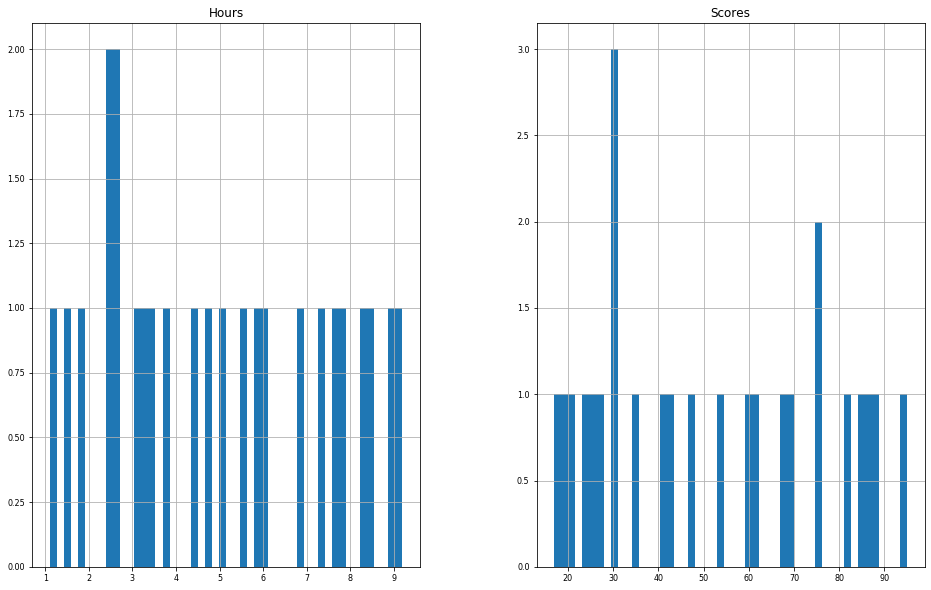

In [21]:
kung_san_data[['Scores',
 "Hours",
]].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [22]:
import numpy as np

In [23]:
y_mean = np.average(y)
std_dev_y = np.std(y)

x_mean = np.average(x)
std_dev_x = np.std(x)

In [24]:
print("x_mean = %.2f, y_mean = %.2f, std_dev(x) = %.2f, std_dev(y) = %.2f"%(x_mean, y_mean, std_dev_x, std_dev_y))

x_mean = 51.48, y_mean = 5.01, std_dev(x) = 24.78, std_dev(y) = 2.47


In [25]:
rxy = np.corrcoef(x,y)[1,0]

print("Correlation coeffcient: %.3f"%(rxy))

Correlation coeffcient: 0.976


In [26]:
theta_1 = rxy * std_dev_y / std_dev_x

theta_1




0.09748029484746755

In [27]:
theta_0 = y_mean - (theta_1 * x_mean)

theta_0

-0.006285578747629472

In [28]:
import matplotlib.pyplot as plt

In [29]:
x_data = np.linspace(np.min(x), np.max(x), 100)
y_data = theta_0 + theta_1 * x_data

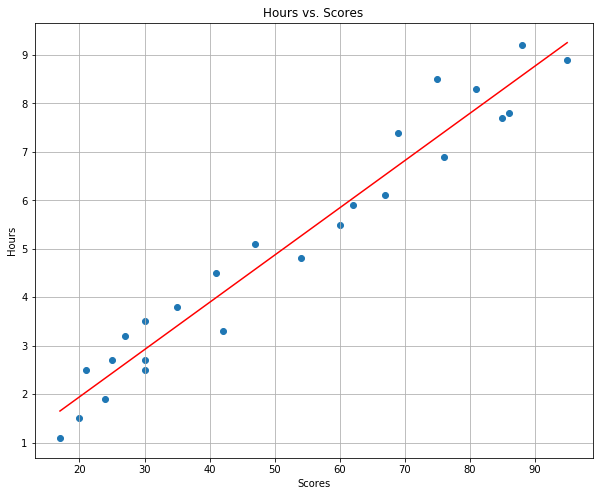

In [30]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Hours vs. Scores")
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.plot(x_data, y_data, color = 'r')
plt.grid()
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
x1 = x
x2 = np.square(x)

In [33]:
X = np.vstack((x1,x2)).T
X.shape

(25, 2)

In [34]:
model = LinearRegression().fit(X,y)

In [35]:
th_0 = model.intercept_
th_0

-0.3531536019200434

In [36]:
th_1 = model.coef_
th_1

array([ 0.11371203, -0.00014974])

In [37]:
x1_data = np.linspace(np.min(x), np.max(x), 100)
x2_data = np.square(x1_data)

ym_data = th_0 + th_1[0] * x1_data + th_1[1]*x2_data

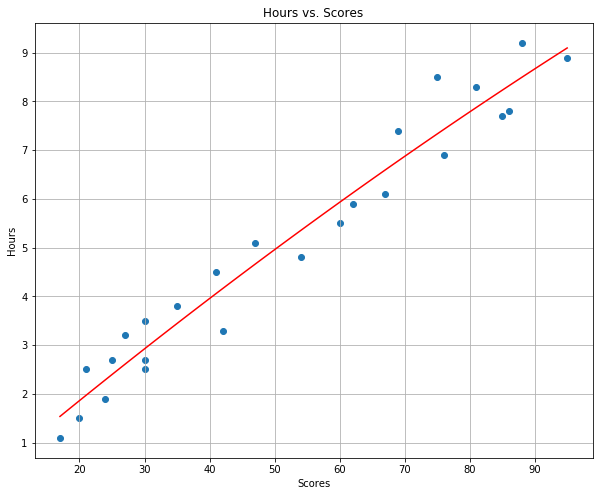

In [38]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Hours vs. Scores")
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.plot(x1_data, ym_data, color = 'r')
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [39]:
h = float(input("Enter the Hours:"))

Enter the Hours:9.25


In [40]:
x1 = h
x2 = h*h

w = th_0 + th_1[0] * x1 + th_1[1]*x2

print("Predicted Scores = {}".format(w))

Predicted Scores = 0.6858709426812781


In [41]:
X = kung_san_data.iloc[:, :-1].values  
y = kung_san_data.iloc[:, 1].values 

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [43]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


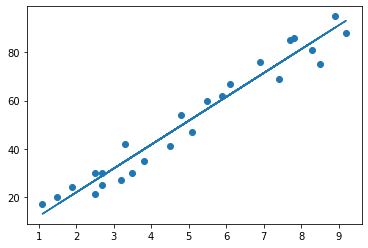

In [44]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [45]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [46]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
 #Fit the linear Regression Model
LinReg= LinearRegression(normalize=True)
LinReg.fit(X_train,y_train)

#Predict the value for new, unseen data
lin_pred = LinReg.predict(X_test)

# Find Accuracy using score method
LinReg_accuracy =round(LinReg.score(X_train,y_train)*100,2)

In [48]:
Model_Comparison = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Score': [LinReg_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,95.16,Linear Regression


In [52]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours = [[9.25]]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [50]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
